## xG value

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
from statsbombpy import sb
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings 

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
#load data - store it in train dataframe
train_overall = pd.DataFrame()
train_overall = sb.matches(competition_id=9, season_id=281)

In [3]:
train_overall

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [4]:
#i need all matches events data in a df
train = pd.DataFrame()
for match_id_value in train_overall['match_id']:
    events_data = sb.events(match_id=match_id_value)  
    train = pd.concat([train, events_data])

In [5]:
shots_overall = train.loc[train['type'] == 'Shot']
shots = shots_overall.loc[shots_overall['team_id'] == 904]

In [6]:
def eliminar_columnas_nan(df):
    return df.dropna(axis=1, how='all')

In [7]:
# Extract coordinates with correct scaling
shots["X"] = shots['location'].apply(lambda cell: cell[0])
shots["Y"] = shots['location'].apply(lambda cell: cell[1])

# Define successful and unsuccessful outcomes
successful_outcomes = ['Goal']
unsuccessful_outcomes = ['Blocked', 'Off T', 'Post', 'Saved', 'Wayward', 'Saved Off T', 'Saved To Post']

# Classify each shot as successful or not successful
shots['Goal'] = shots['shot_outcome'].apply(lambda x: 1 if x in successful_outcomes else 0)

In [8]:
clean_shots = eliminar_columnas_nan(shots)

In [9]:
clean_shots.drop('location', axis = 1, inplace = True)

In [10]:
clean_shots.drop('shot_outcome', axis = 1, inplace = True)

In [11]:
clean_shots.drop('team_id', axis = 1, inplace = True)

In [12]:
clean_shots.drop('match_id', axis = 1, inplace = True)

In [13]:
#under_pressure -> true = 1
#shot_statsbomb_xg
#team
#shot_end_location
#related_events

clean_shots.drop('related_events', axis = 1, inplace = True)

In [14]:
clean_shots.drop('player', axis = 1, inplace = True)

In [15]:
clean_shots["goal_x"] = clean_shots['shot_end_location'].apply(lambda cell: cell[0])
clean_shots["goal_y"] = clean_shots['shot_end_location'].apply(lambda cell: cell[1])
clean_shots["goal_z"] = clean_shots['shot_end_location'].apply(lambda cell: cell[2] if len(cell) > 2 else 0)

In [16]:
clean_shots["distance"] = clean_shots["X"].apply(lambda cell:120 - cell)

In [17]:
clean_shots

,duration,id,index,minute,off_camera,out,period,play_pattern,player_id,position,...,shot_open_goal,shot_saved_off_target,shot_saved_to_post,X,Y,Goal,goal_x,goal_y,goal_z,distance
4094,0.217872,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,7,NaN,NaN,1,Regular Play,38004.0,Left Wing Back,...,NaN,NaN,NaN,114.6,33.5,0,118.1,35.7,0.2,5.4
4096,0.085298,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,684,13,NaN,NaN,1,From Corner,8221.0,Center Back,...,NaN,NaN,NaN,113.9,47.4,0,114.1,46.8,0.0,6.1
4097,0.402989,bb53b537-1685-4019-9e8f-98f3805828eb,848,16,NaN,NaN,1,Regular Play,3500.0,Right Defensive Midfield,...,NaN,NaN,NaN,89.2,42.5,0,101.4,41.3,0.0,30.8
4098,1.732516,0247fb51-7bf7-4be6-82d7-bf63892bdd53,854,16,NaN,NaN,1,From Corner,8221.0,Center Back,...,NaN,NaN,NaN,110.2,32.6,0,116.4,38.1,0.0,9.8
4100,0.479048,cf7357c9-3bd6-425f-ac34-ef7f11897394,1193,24,NaN,NaN,1,Other,32289.0,Center Forward,...,NaN,NaN,NaN,108.0,40.0,1,120.0,42.9,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,0.287836,5df16513-d372-4a46-9661-09c10341a40b,2051,47,NaN,NaN,2,Regular Play,40724.0,Left Wing,...,NaN,NaN,NaN,110.6,35.0,0,118.0,36.6,1.3,9.4
3523,1.221804,c8521aea-0248-4c7c-9036-c103ff5e2416,2357,56,NaN,NaN,2,From Counter,32289.0,Center Forward,...,NaN,NaN,NaN,93.9,43.9,0,120.0,45.0,6.3,26.1
3524,1.234672,f8cd5da5-6a20-41ad-8794-4397b76a11cf,2661,63,NaN,NaN,2,From Throw In,40724.0,Left Wing,...,NaN,NaN,NaN,104.8,45.4,1,120.0,38.2,2.0,15.2
3531,0.878213,bcea08d2-3377-4014-a452-aec0bed0d80e,3422,86,NaN,NaN,2,Regular Play,32289.0,Left Center Forward,...,NaN,NaN,NaN,98.6,31.6,0,120.0,34.9,0.9,21.4


In [18]:
goals = clean_shots.loc[clean_shots['Goal']==1]

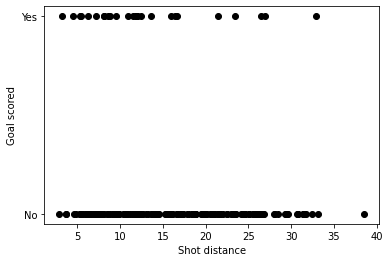

In [19]:
#first 200 shots
shots_200=clean_shots.iloc[:200]
#plot first 200 shots goal distance
fig, ax = plt.subplots()
ax.plot(shots_200['distance'], shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot distance")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

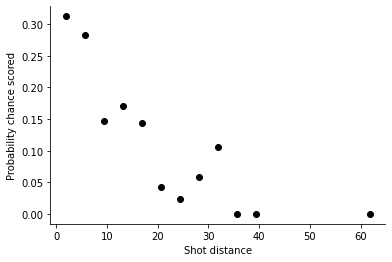

In [20]:
#number of shots from distance
shotcount_dist = np.histogram(clean_shots['distance'], bins=40, range=[0, 150])
#number of goals from distance
goalcount_dist = np.histogram(goals['distance'], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal from a given distance
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Optimization terminated successfully.
         Current function value: 0.373431
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Goal   No. Observations:                  623
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                 0.06966
Time:                        19:56:51   Log-Likelihood:                -232.65
converged:                       True   LL-Null:                       -250.07
Covariance Type:            nonrobust   LLR p-value:                 3.578e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4431      0.256     -1.730      0.084      -0.945       0.059
distance      -0.1022      0.

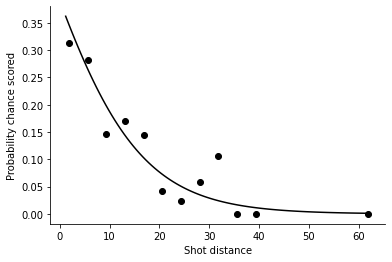

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#logistic regression model
logistic_model = logit(formula="Goal ~ distance", data=clean_shots).fit()
print(logistic_model.summary())

# model parameters
coefficients = logistic_model.params


distance_range = np.linspace(clean_shots['distance'].min(), clean_shots['distance'].max(), 100)

# Calculate the predicted probabilities using the logistic regression model
xGprob = logistic_model.predict(pd.DataFrame({'distance': distance_range}))

# Plotting the data points
fig, ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker='.', markersize=12, color='black')

# Plot the logistic regression line (predicted probabilities)
ax.plot(distance_range, xGprob, linestyle='solid', color='black')

# Adding labels and customizing the plot
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

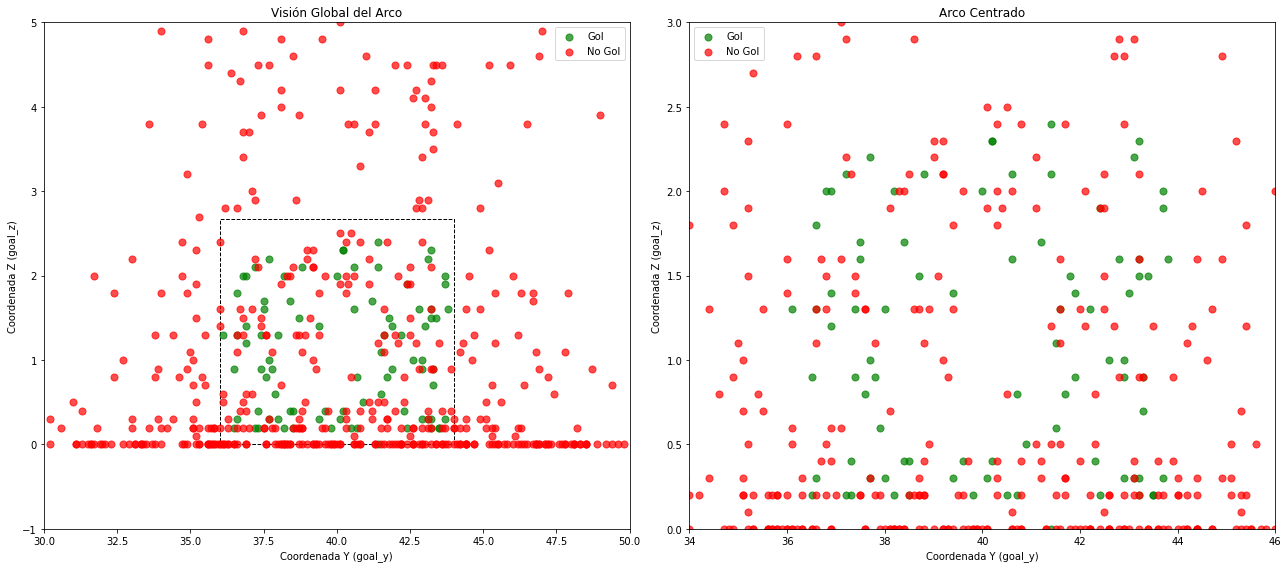

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

def dibujar_arco(ax, centered=False):
    # Define the dimensions of the goal area
    goal_width = 8  # Width of the goal area in meters
    goal_height = 2.67  # Height of the goal area in meters
    x_start = 36  # Starting x-coordinate of the goal area
    x_end = 44  # Ending x-coordinate of the goal area

    if centered:
        x_start = 34  # Starting x-coordinate for centered view
        x_end = 46  # Ending x-coordinate for centered view

    # Add a rectangle to represent the goal area
    rect = patches.Rectangle((x_start, 0), goal_width, goal_height, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect)

def dibujar_arco_sin(ax, centered=False):
    # Define the dimensions of the goal area
    goal_width = 8  # Width of the goal area in meters
    goal_height = 2.67  # Height of the goal area in meters



def scatterplot_tiros(df, ax):
    # Separate the data by goal outcome
    goals = df[df['Goal'] == 1]
    no_goals = df[df['Goal'] == 0]
    
    # Plot the shots that resulted in goals
    ax.scatter(goals['goal_y'], goals['goal_z'], color='green', label='Gol', s=50, alpha=0.7)
    
    # Plot the shots that did not result in goals
    ax.scatter(no_goals['goal_y'], no_goals['goal_z'], color='red', label='No Gol', s=50, alpha=0.7)
    
    ax.set_xlabel('Coordenada Y (goal_y)')
    ax.set_ylabel('Coordenada Z (goal_z)')
    ax.legend()

# Example usage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot global view
ax1.set_title('Visión Global del Arco')
dibujar_arco(ax1, centered=False)
scatterplot_tiros(clean_shots, ax1)
ax1.set_xlim(30, 50)
ax1.set_ylim(-1, 5)

# Plot centered view
ax2.set_title('Arco Centrado')
dibujar_arco_sin(ax2, centered=True)
scatterplot_tiros(clean_shots, ax2)
ax2.set_xlim(34, 46)
ax2.set_ylim(0, 3)

plt.tight_layout()
plt.show()